# Capstone Project

In [62]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
import regex as re

from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
                              precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

from bs4 import BeautifulSoup   

import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

pd.set_option('display.max_colwidth',300)
sns.set_style("darkgrid")

### Load csv data 

In [63]:
review = pd.read_csv('./datasets/Womens Clothing E-Commerce ReviewsV2.csv')

In [64]:
review['combined']=review['Title'] +' '+ review['Review Text']

In [65]:
#review.combined.head()
#review.head()

In [66]:
combined = 'combined'

review[combined] = review[combined].str.replace(r"http\S+", "")
review[combined] = review[combined].str.replace(r"http", "")
review[combined] = review[combined].str.replace(r"@\S+", "")
review[combined] = review[combined].str.replace(r"@", "at")
review[combined] = review[combined].str.lower().str.strip()

### Consolidated Cleaning function

In [67]:
from nltk import word_tokenize
#tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()

In [68]:
def review_to_words(raw_review):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    # print(raw_review)
    # 1. Remove HTML.
    #result_1 = BeautifulSoup(raw_review).get_text()
    
    # 2. Remove non-letters.
    #result_2 = re.sub("[^a-zA-Z]", " ", result_1)
    
    # 3. Convert to lower case, split into individual words.
    #result_3 = tokenizer.tokenize(result_2.lower())
    result_3 = word_tokenize(raw_review.lower())
    
    #4. Lemmatize result
    result_4 = [lemmatizer.lemmatize(i) for i in result_3]
    
    # 4. In Python, searching a set is much faster than searching
    # a list, so convert the stop words to a set.
    stops = set(stopwords.words('english'))
    
    # 5. Remove stop words.
    result_5 = [w for w in result_4 if not w in stops]
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    # print(result_5)
    return(" ".join(result_5))

In [69]:
# Get the number of reviews based on the dataframe size.
total_combined = review.shape[0]
print(f'There are {total_combined} messages to clean.')

# Initialize an empty list to hold the clean messages.
clean_total_combined = []

There are 23486 messages to clean.


In [70]:
print("Cleaning and parsing the input...")

total_combined_no = review.shape[0]

j = 0
for total_combined in review['combined']:
    # Convert review to words, then append to clean_train_reviews.
#    clean_total_combined.append(review_to_words(total_combined))
    review['combined'].replace(review_to_words(total_combined))
    # If the index is divisible by 10000, print a message
    if (j + 1) % 10000 == 0:
        print(f'Message {j + 1} of {total_combined_no}.')
    
    j += 1


Cleaning and parsing the input...
Message 10000 of 23486.
Message 20000 of 23486.


In [71]:
review['Rating'].value_counts() / len(review)

5    0.559099
4    0.216171
3    0.122243
2    0.066635
1    0.035851
Name: Rating, dtype: float64

###  Load in the Sentiment IntensityAnalyzer from Vader and add compound, negative, neutral, and positive scores into the DataFrame.

In [72]:
review.drop(['Title','Review Text'], axis=1, inplace=True)

In [73]:
#review.to_csv('./datasets/review.csv', index=False)

In [74]:
#review.head()

In [75]:
vader = SentimentIntensityAnalyzer()
vader_score = []

for comment in review['combined']:
    vader_score.append(vader.polarity_scores(comment))
    
vader_score = pd.DataFrame(vader_score)
review = pd.concat([review, vader_score], axis=1)

In [76]:
#review.sort_values('compound', ascending=False)

In [77]:
#vader_score.head()
#review.head()
#review.shape
#len(review['Rating'])
print(review['compound'].size)
print(review['Rating'].size)


23486
23486


In [78]:
#

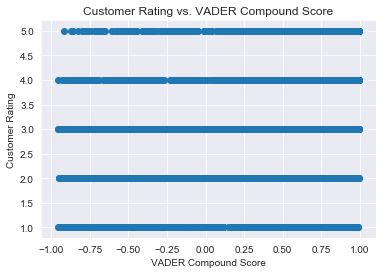

In [79]:
x = review['compound']
y = review['Rating']

# Plot
plt.scatter(x, y)
plt.title('Customer Rating vs. VADER Compound Score')
plt.xlabel('VADER Compound Score')
plt.ylabel('Customer Rating')
plt.show()

In [80]:
review.head()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,combined,compound,neg,neu,pos
0,767,33,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful - silky and sexy and comfortable,0.8932,0.000,0.272,0.728
1,1080,34,5,1,4,General,Dresses,Dresses,"love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly ...",0.9729,0.000,0.664,0.336
2,1077,60,3,0,0,General,Dresses,Dresses,"some major design flaws i had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overa...",0.9427,0.026,0.800,0.174
3,1049,50,5,1,0,General Petite,Bottoms,Pants,"my favorite buy! i love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",0.7182,0.200,0.355,0.445
4,847,47,5,1,6,General,Tops,Blouses,flattering shirt this shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,0.9407,0.000,0.677,0.323


In [81]:
#review['compound'].dtype

In [84]:
#def do_grade (compound):
#     print(compound)
#     if compound <= -0.6000 :          # -0.6 to -1.0
#         grade = 'VB'
#     elif compound <= -0.2:        # -0.59 to -0.2
#         grade = 'B'
#     elif compound <= 0.2:         # -0.19 to  0.2
#         grade = 'N'
#     elif compound < 0.6:         #  0.21 to  0.6
#         grade = 'G'
#     else:
#         grade =  'VG'           #  0.61 to  1.0
#    return grade


In [85]:
#review['grade'] = "N"

#for compound in review['compound']:
#    review['grade'] = do_grade(review['compound'])

# d = {range(-1.0000, -0.6000): 'VB', range(-0.5999, -0.2000): 'B', range(-0.1999, 0.2000): 'N', 
#      range(0.2001, 0.6000): 'G', range(0.6001, 1.0000): 'VG'}
# review['grade'] = review['compound'].apply(lambda x: next((v for k, v in d.items() if x in k), 0))


### Wordcloud visualization of the reviews¶

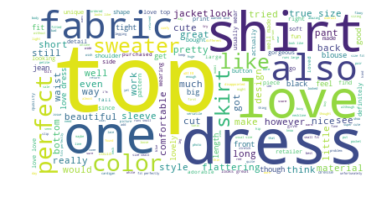

In [86]:
text_reviews = " ".join(review["combined"])

stops = set(stopwords.words('english'))
wordcloud = WordCloud(stopwords=stops, background_color="white").generate(text_reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()